In this mini project, I will be cleaning and analyzing social media user data to provide managerial advice to my company who plans to launch a social media campaign for our company. My company sells powdered protein and other health supplements for adults. Assume our target audience is young adults to middle-aged (18-50 year old) consumers in the US.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rawDF = pd.read_csv("social_media_use.csv")

rawDF.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [4]:
rawDF.isna().sum() 

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [7]:
rawDF.dtypes

age              int64
gender          object
time_spent       int64
platform        object
interests       object
location        object
demographics    object
profession      object
income           int64
indebt            bool
isHomeOwner       bool
Owns_Car          bool
dtype: object

It appears data was already clean upon download.

ChatGPT used for help with code below: 
targetaudienceDF = rawDF.loc[rawDF["location"].str.contains("United States", na=False) &
                                   rawDF["Age"].str.contains("18", na=False)
                                   ]

targetaudienceDF.head()    /// how do I make the second function return ages 18 through 50
ChatGPT
To filter the "Age" column to include ages from 18 to 50, you can modify the condition using a regular expression that matches ages in this range. Here's how you can do it:

python
Copy code
import pandas as pd

# Filter the DataFrame to include rows with "location" containing "United States" and "Age" between 18 and 50
targetaudienceDF = rawDF.loc[
    rawDF["location"].str.contains("United States", na=False) &
    rawDF["Age"].astype(str).str.match(r'^(1[8-9]|[2-4][0-9]|50)$', na=False)
]

# Display the filtered DataFrame
targetaudienceDF.head()
In this code:

rawDF["Age"].astype(str).str.match(r'^(1[8-9]|[2-4][0-9]|50)$', na=False) checks if each age value matches the regular expression pattern for ages from 18 to 50.
The regular expression pattern r'^(1[8-9]|[2-4][0-9]|50)$' ensures that the age falls within the desired range.
Adjust the regular expression pattern if you need to modify the age range or pattern.
This will filter the DataFrame rawDF to include only rows where the location contains "United States" and the age is between 18 and 50 (inclusive).

In [9]:
targetaudienceDF = rawDF.loc[rawDF["location"].str.contains("United States", na=False) &
                                   rawDF["age"].astype(str).str.match(r'^(1[8-9]|[2-4][0-9]|50)$', na=False)
                                   ]

targetaudienceDF.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
5,38,male,3,Facebook,Travel,United States,Urban,Marketer Manager,19179,True,True,True
11,41,non-binary,5,Facebook,Sports,United States,Sub_Urban,Marketer Manager,10350,False,False,False
14,41,non-binary,9,YouTube,Travel,United States,Rural,Student,17743,True,True,False
16,39,male,8,Instagram,Travel,United States,Sub_Urban,Student,14732,True,True,False
18,41,female,9,Facebook,Sports,United States,Sub_Urban,Student,12226,False,False,False


In [14]:
platformGroup = targetaudienceDF.groupby("platform").size()

platformGroup

platform
Facebook     70
Instagram    80
YouTube      70
dtype: int64

% platform usage in target audience

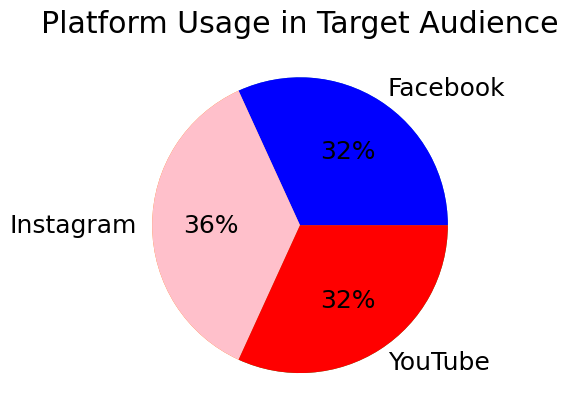

In [28]:
plt.pie(platformGroup)
plt.rcParams["text.color"] = "black"
#changing font size
plt.rcParams["font.size"] = 18

#changing the background color
plt.rcParams["figure.facecolor"] = "white"

plt.title("Platform Usage in Target Audience")

#making labels for the pie chart
plt.pie(platformGroup, labels = platformGroup.index,
        autopct='%1.0f%%',     # <-- making percentage labels
        colors = ["Blue","pink","red"]) # <--- chagning pie chart colors / you can also insert hex codes


plt.show()

Target Audience Interests

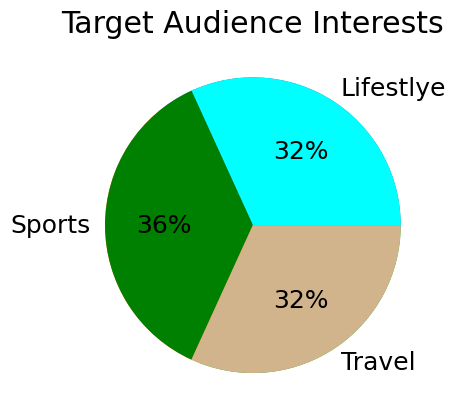

In [43]:
interestGroup = targetaudienceDF.groupby("interests").size()

plt.pie(interestGroup)
plt.rcParams["text.color"] = "black"
#changing font size
plt.rcParams["font.size"] = 18

#changing the background color
plt.rcParams["figure.facecolor"] = "white"

plt.title("Target Audience Interests")

#making labels for the pie chart
plt.pie(platformGroup, labels = interestGroup.index,
        autopct='%1.0f%%',     # <-- making percentage labels
        colors = ["Cyan","Green","Tan"]) # <--- chagning pie chart colors / you can also insert hex codes


plt.show()

Age distribution of the data set

<function matplotlib.pyplot.show(close=None, block=None)>

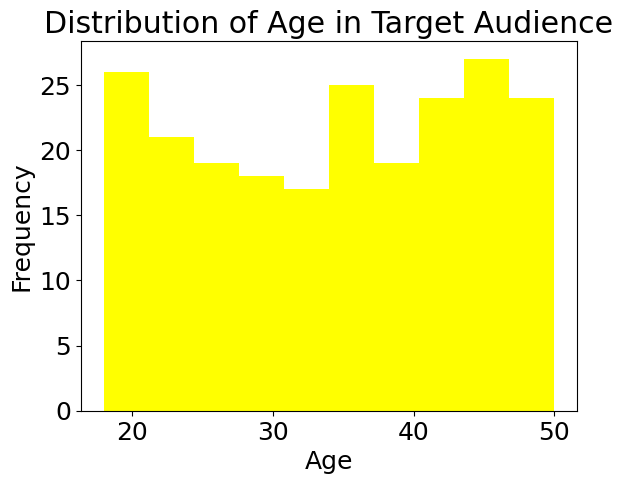

In [42]:
plt.hist(targetaudienceDF["age"],
         color="Yellow")
#Labeling X and Y axis
plt.xlabel("Age")
plt.ylabel("Frequency")
#Changing historgam title
plt.title("Distribution of Age in Target Audience")

plt.show

time spent on social media:

<function matplotlib.pyplot.show(close=None, block=None)>

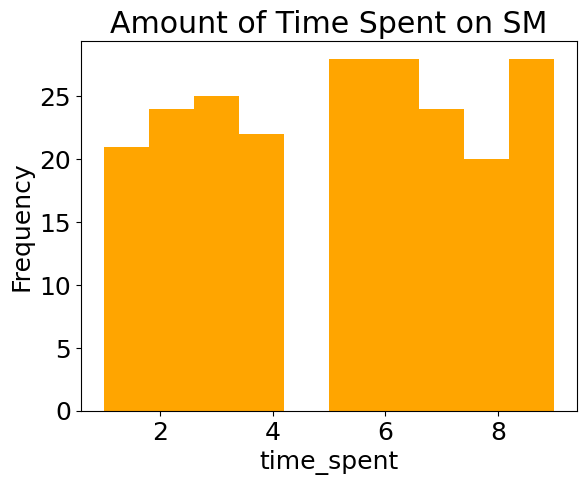

In [41]:
plt.hist(targetaudienceDF["time_spent"],
         color="Orange")
#Labeling X and Y axis
plt.xlabel("time_spent")
plt.ylabel("Frequency")
#Changing historgam title
plt.title("Amount of Time Spent on SM")

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

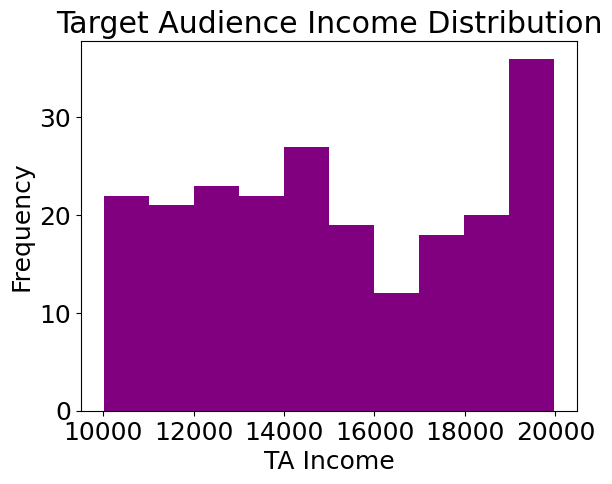

In [40]:
plt.hist(targetaudienceDF["income"],
         color="Purple")
#Labeling X and Y axis
plt.xlabel("TA Income")
plt.ylabel("Frequency")
#Changing historgam title
plt.title("Target Audience Income Distribution")
plt.show


Other analysis:

In [35]:
targetaudienceDF['age'].corr(targetaudienceDF['time_spent'])

-0.021463315756985107